# Part A

**DOMAIN**: Automobile

**CONTEXT**: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. 

**DATA DESCRIPTION**:  

* cylinders: multi-valued discrete
* acceleration: continuous 
* displacement: continuous 
* model year: multi-valued discrete
* horsepower: continuous  
* origin: multi-valued discrete
* weight: continuous 
* car name: string (unique for each instance)
* mpg: continuous

**PROJECT OBJECTIVE**: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories

## STEPS AND TASKS

### 1. Data Understanding & Exploration:

#### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [1]:
import pandas as pd

car_name_df = pd.read_csv('Car name.csv')
print(car_name_df.head())


                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino


#### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [2]:
car_attributes_df = pd.read_json('Car-Attributes.json')
print(car_attributes_df.head())


    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1


#### C. Merge both the DataFrames together to form a single DataFrame 

In [3]:
# Adding an index column to both DataFrames
car_name_df['index'] = car_name_df.index
car_attributes_df['index'] = car_attributes_df.index

# Display the updated DataFrames
print(car_name_df.head())
print(car_attributes_df.head())

                    car_name  index
0  chevrolet chevelle malibu      0
1          buick skylark 320      1
2         plymouth satellite      2
3              amc rebel sst      3
4                ford torino      4
    mpg  cyl   disp   hp    wt   acc  yr  origin  index
0  18.0    8  307.0  130  3504  12.0  70       1      0
1  15.0    8  350.0  165  3693  11.5  70       1      1
2  18.0    8  318.0  150  3436  11.0  70       1      2
3  16.0    8  304.0  150  3433  12.0  70       1      3
4  17.0    8  302.0  140  3449  10.5  70       1      4


Given the structure of the DataFrames, it seems there isn't a direct common column to merge on. We can add an identifier to each DataFrame to facilitate merging.

We can assume that both DataFrames are in the same order since car_name_df has the car names, and car_attributes_df has the corresponding attributes. We can add an index column to both DataFrames and merge on this index.

In [4]:
# Merging both DataFrames on the 'index' column
merged_df = pd.merge(car_name_df, car_attributes_df, on='index')

# Dropping the index column as it is no longer needed
merged_df = merged_df.drop(columns=['index'])

# Display the merged DataFrame
print(merged_df.head())

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1


#### D. Print 5 point summary of the numerical features and share insights. 

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
merged_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Insights**:
* There is a wide range of fuel efficiencies in the dataset, indicating a diverse set of vehicles, possibly from different eras or categories (e.g., sports cars vs. economy cars).
* The dataset is skewed towards cars with 4 and 8 cylinders, which are common configurations for many vehicles.
* There is a significant spread in engine displacement, suggesting the presence of both compact and high-performance vehicles.
* The weights vary widely, indicating the dataset includes a mix of small, lightweight cars and large, heavy ones.
* The dataset includes both high-performance cars with fast acceleration and slower cars, possibly indicating a variety of car types and ages.
* The dataset covers cars primarily from the 1970s to early 1980s, reflecting the characteristics of cars from this era.
* The dataset likely includes cars from three different regions or countries, with a majority from the first category.

### 2. Data Preparation & Analysis:

#### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [7]:
missing_values = merged_df.isnull().mean() * 100
print(missing_values)


car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [8]:
csv_file_path = './merged_data1.csv'
merged_df.to_csv(csv_file_path, index=False)

In [9]:
# Convert 'hp' to numeric, setting errors='coerce' to handle '?'
merged_df['hp'] = pd.to_numeric(merged_df['hp'], errors='coerce')

# Calculate the median of 'hp'
hp_median = merged_df['hp'].median()

# Impute missing values with the median
merged_df['hp'].fillna(hp_median, inplace=True)

# Verify that there are no more missing values in 'hp'
print(merged_df['hp'].isnull().sum())


0


In [10]:
merged_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



After converting 'hp' to numeric and imputing the missing values, the horsepower (hp) data now has a mean of approximately 104.3, with a standard deviation of 38.2, a minimum value of 46, and a maximum value of 230, indicating a diverse range of car engine power within the dataset.

#### B. Check for duplicate values in the data and impute with the best suitable approach.

In [11]:
duplicates = merged_df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicates
# merged_df = merged_df.drop_duplicates()


Number of duplicate rows: 0


#### C. Plot a pairplot for all features. 

C:\Users\janne\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


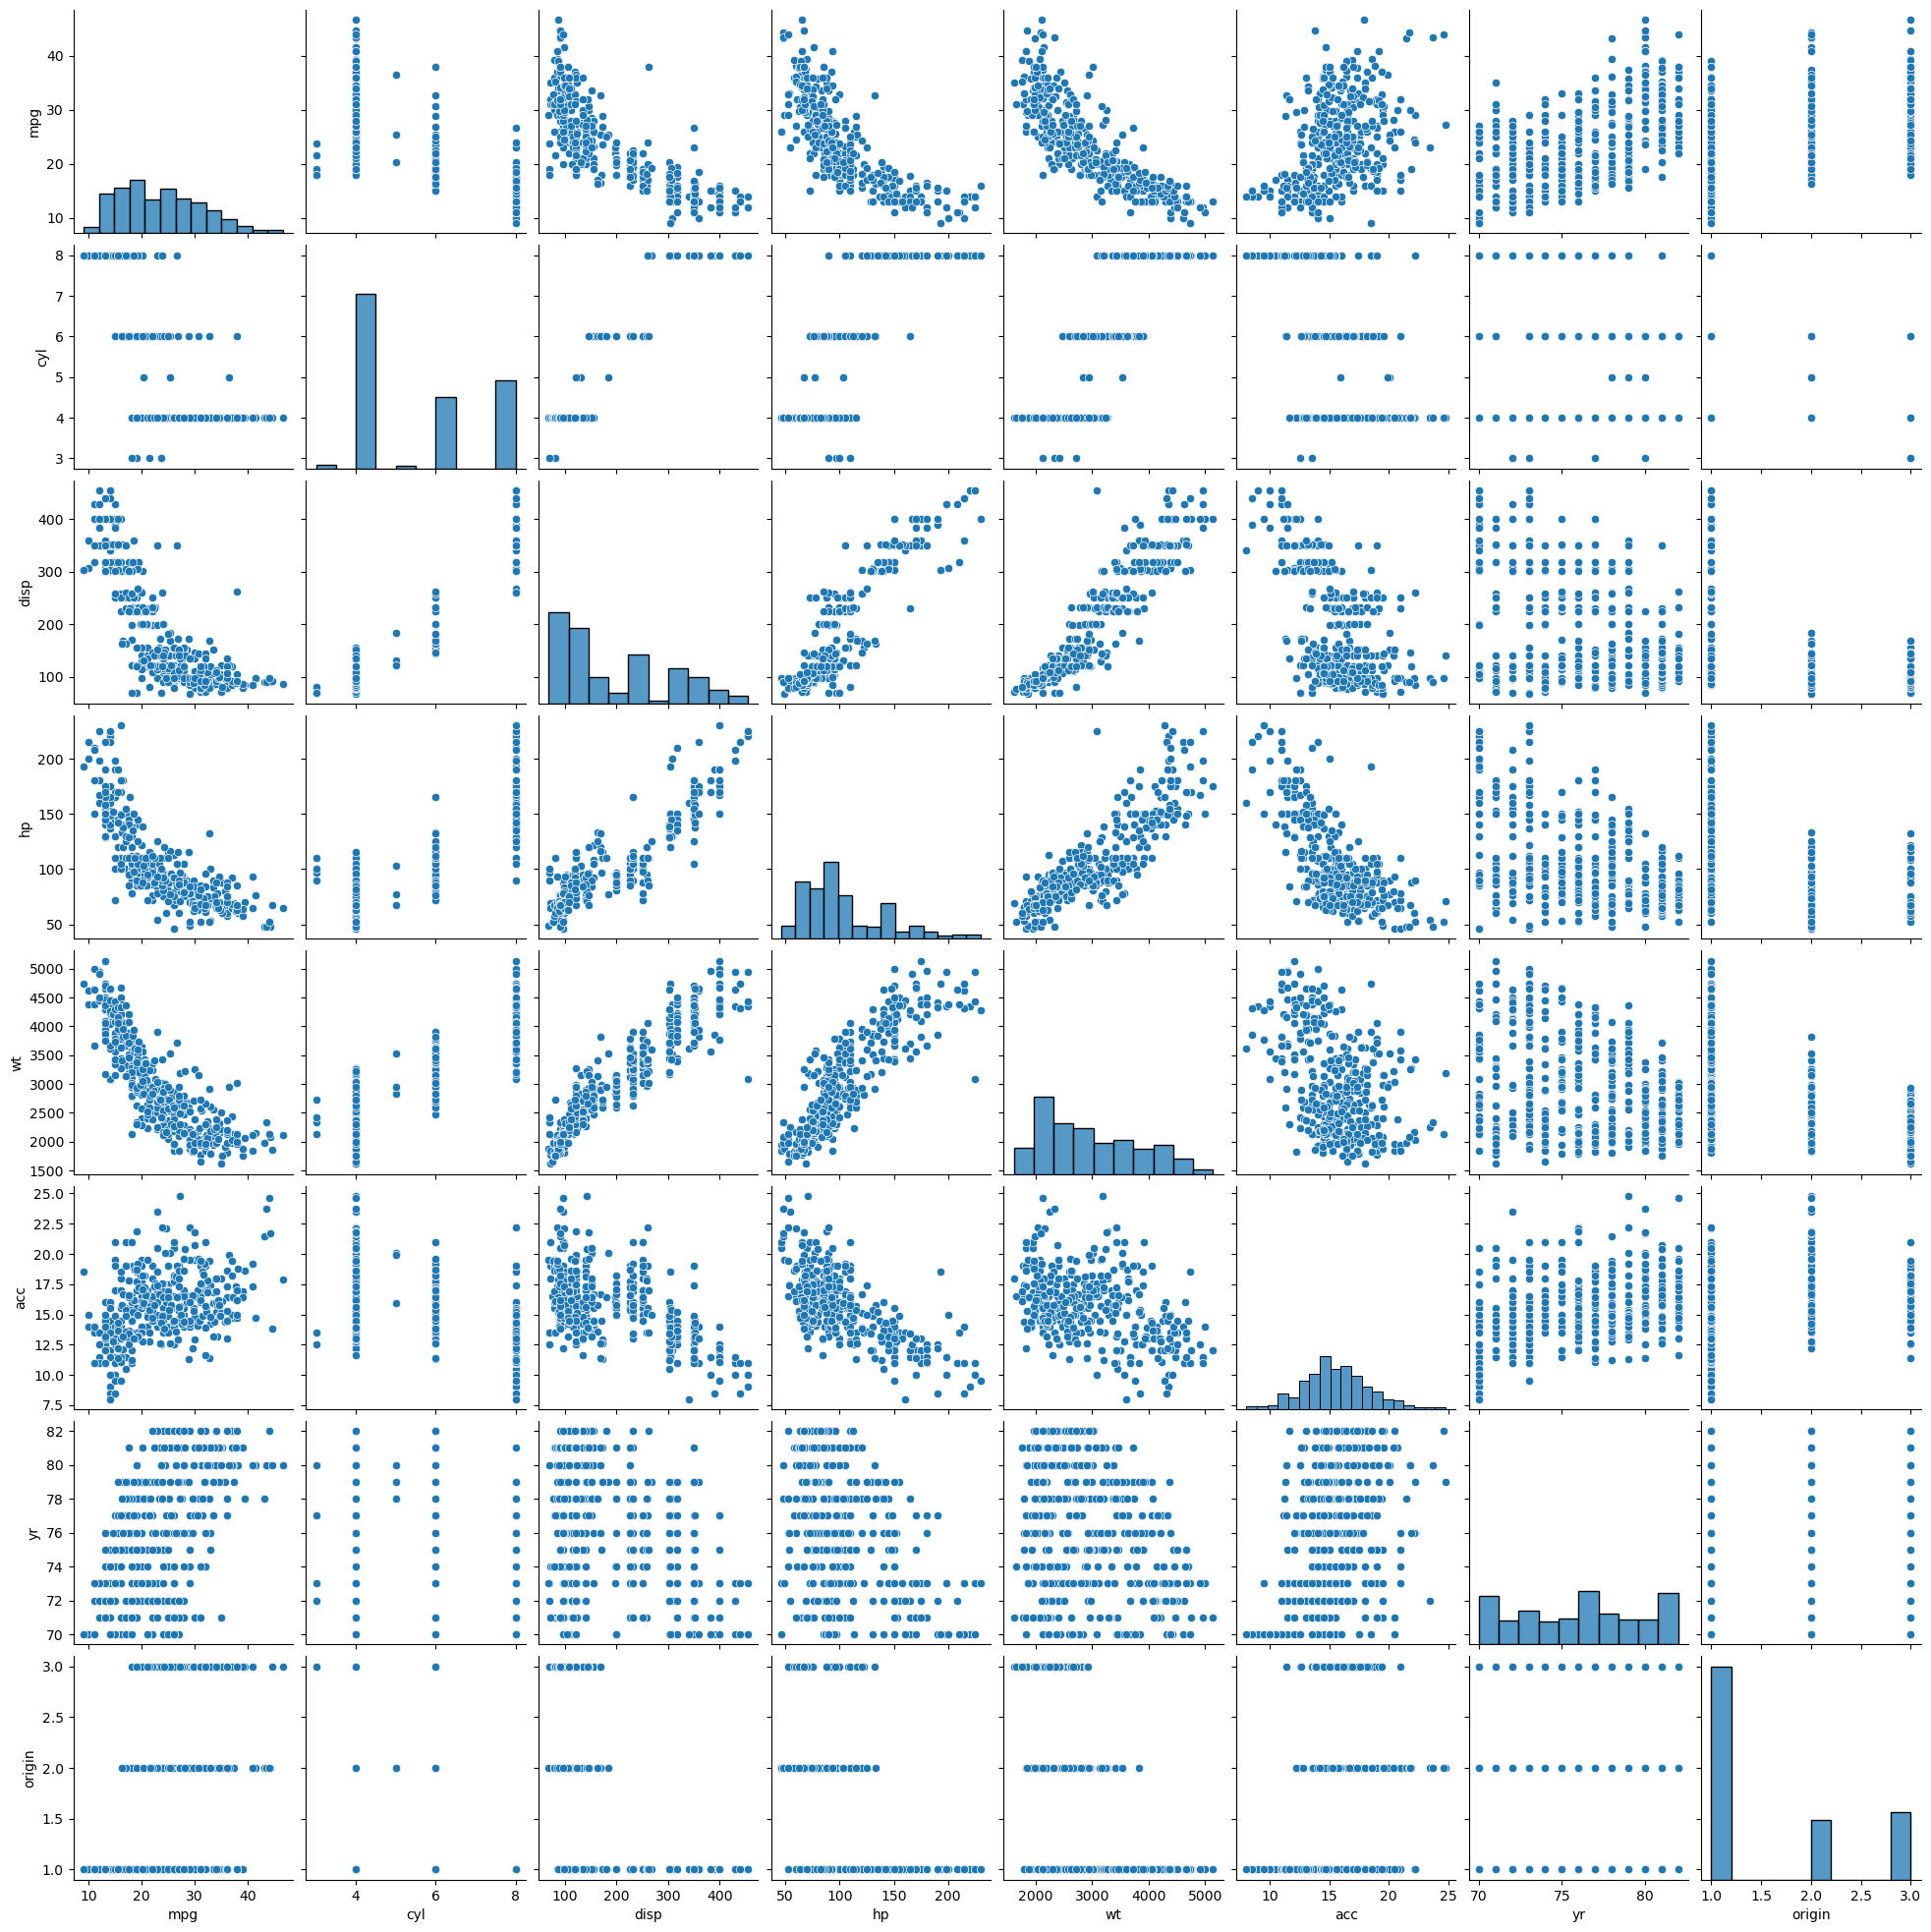

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(merged_df)
plt.show()


#### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

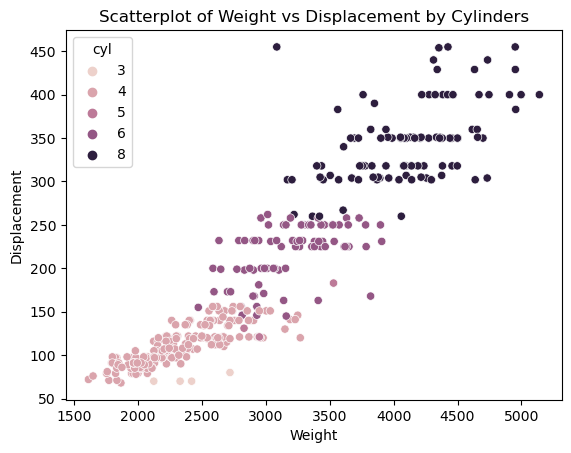

In [13]:
sns.scatterplot(x='wt', y='disp', hue='cyl', data=merged_df)
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.title('Scatterplot of Weight vs Displacement by Cylinders')
plt.show()


#### E. Share insights for Q2.d.

**Engine Size and Vehicle Weight**:

Vehicles with more cylinders generally have larger engines (higher displacement) and are heavier. This is expected as vehicles with more cylinders typically have larger, more powerful engines which require a stronger (and thus heavier) vehicle structure.

**Efficiency vs. Power**:

Vehicles with fewer cylinders (3 or 4) are likely designed for efficiency and may be smaller, lighter cars. In contrast, vehicles with more cylinders (6 or 8) are likely designed for power and performance, leading to larger, heavier vehicles.

**Cluster Patterns**:

There are distinct clusters in the scatterplot, suggesting that vehicles are often designed within certain weight and displacement ranges based on their cylinder count. For instance:
A cluster of 4-cylinder vehicles around 2000-3000 lbs and 100-150 displacement.
A cluster of 6-cylinder vehicles around 3000-4000 lbs and 200-300 displacement.
A cluster of 8-cylinder vehicles around 3500-5000 lbs and 300-450 displacement.

#### H. Check for unexpected values in all the features and datapoints with such values.

Handled unexpected values in 2.A while handling missing values in 'hp'

### 3. Clustering:

#### A. Apply K-Means clustering for 2 to 10 clusters.

In [14]:
from sklearn.cluster import KMeans
import numpy as np

X = merged_df[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'mpg']]

inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
for n, value in zip(range(2, 11), inertia):
    print(f'Number of clusters: {n}, Inertia: {value}')

C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Number of clusters: 2, Inertia: 74289597.34546567
Number of clusters: 3, Inertia: 34208168.433409035
Number of clusters: 4, Inertia: 19056685.93647984
Number of clusters: 5, Inertia: 13759729.468531623
Number of clusters: 6, Inertia: 10295880.687225254
Number of clusters: 7, Inertia: 7698859.827279655
Number of clusters: 8, Inertia: 5662639.403079212
Number of clusters: 9, Inertia: 4726897.537810873
Number of clusters: 10, Inertia: 3999643.2296900665


#### B. Plot a visual and find elbow point.

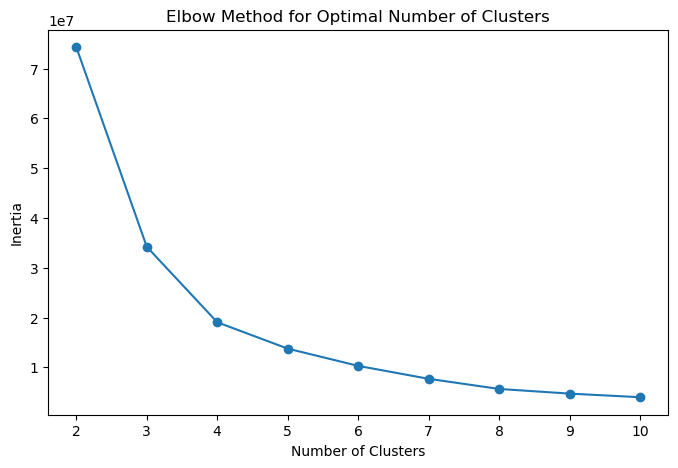

In [15]:
import matplotlib.pyplot as plt

# Plot inertia values to find the elbow point
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### C. On the above visual, highlight which are the possible Elbow points. 

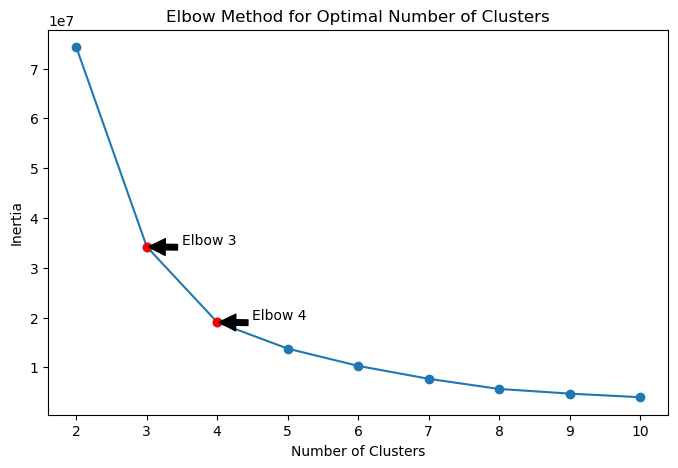

In [16]:
import matplotlib.pyplot as plt

# Define the number of clusters and their corresponding inertia values
num_clusters = list(range(2, 11))
elbow_points = [3, 4]  # Possible elbow points based on visual inspection

# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o')

# Highlight elbow points
for elbow in elbow_points:
    plt.plot(elbow, inertia[elbow - 2], 'ro')  # Red color for elbow points

# Annotate the elbow points
for elbow in elbow_points:
    plt.annotate(f'Elbow {elbow}', 
                 xy=(elbow, inertia[elbow - 2]), 
                 xytext=(elbow+0.5, inertia[elbow - 2]+5e5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### D. Train a K-means clustering model once again on the optimal number of clusters.

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have your data stored in merged_df

# List to store cluster assignments for each number of clusters
cluster_assignments = []

# Potential numbers of clusters
potential_clusters = [3, 4]

# Loop through the potential number of clusters
for n_clusters in potential_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Get cluster assignments for each data point
    cluster_assignments.append(kmeans.labels_)


C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [18]:
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in merged_df

# List to store silhouette scores for each number of clusters
silhouette_scores = []

# Loop through the potential number of clusters
for n_clusters in potential_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit KMeans to the data
    kmeans.fit(X)
    # Get cluster assignments for each data point
    cluster_labels = kmeans.labels_
    # Calculate silhouette score for the current number of clusters
    silhouette = silhouette_score(X, cluster_labels)
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette)

# Print silhouette scores for each number of clusters
for i, k in enumerate(potential_clusters):
    print(f"Silhouette score for {k} clusters: {silhouette_scores[i]}")


C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Silhouette score for 3 clusters: 0.5859933440062476
Silhouette score for 4 clusters: 0.5795987329922256


#### E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [19]:
import pandas as pd

# Assuming you have your DataFrame stored in merged_df and cluster_assignments containing cluster labels

# Add a new column 'cluster_label' to the DataFrame and populate it with cluster labels
merged_df['cluster_label'] = cluster_assignments[0]  # Assuming cluster_assignments[0] contains cluster labels for 3 clusters

# Now merged_df will have a new column 'cluster_label' containing cluster labels based on 3 clusters


#### F. Plot a visual and color the datapoints based upon clusters.

C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\janne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


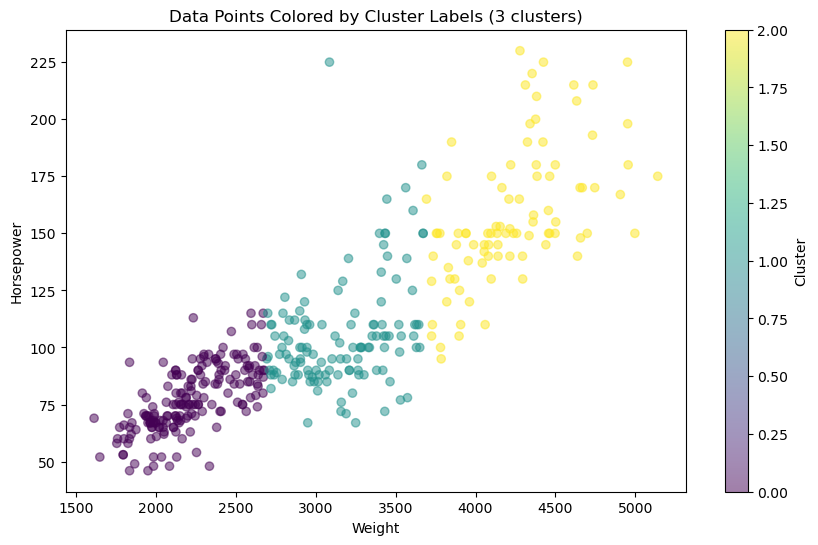

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have your DataFrame stored in merged_df

# Selecting features for clustering
features = ['cyl', 'acc', 'disp', 'hp', 'wt']

# Subsetting the DataFrame with selected features
X = merged_df[features]

# Initializing KMeans models for both 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3)


# Fitting KMeans models to the data
kmeans_3.fit(X)


# Getting cluster assignments for each data point
cluster_assignments_3 = kmeans_3.labels_


# Plotting the data points colored by cluster labels for 3 clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['wt'], X['hp'], c=cluster_assignments_3, cmap='viridis', alpha=0.5)
plt.title('Data Points Colored by Cluster Labels (3 clusters)')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.colorbar(label='Cluster')
plt.show()


#### G. Pass a new DataPoint and predict which cluster it belongs to. 

In [21]:
new_data_point = pd.DataFrame({
    'cyl': [6],
    'acc': [14.1],
    'disp': [245],
    'hp': [100],
    'wt': [3001]
})
# Select the relevant features from the new data point
new_data_features = new_data_point[features]

# Use the trained KMeans model to predict the cluster for the new data point
predicted_cluster_3 = kmeans_3.predict(new_data_features)

print("Predicted cluster (3 clusters):", predicted_cluster_3[0])


Predicted cluster (3 clusters): 1


# Part B

**DOMAIN**: Automobile 

**CONTEXT**:  The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

**DATA DESCRIPTION**: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

* All the features are numeric i.e. geometric features extracted from the silhouette. 

**PROJECT OBJECTIVE**: Apply dimensionality reduction technique – PCA and train a model and compare relative results.

### 1. Data Understanding & Cleaning:
#### A. Read ‘vehicle.csv’ and save as DataFrame.

In [22]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'vehicle.csv'
vehicle_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(vehicle_df.head())


   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

#### B. Check percentage of missing values and impute with correct approach

In [23]:
# Check for missing values
missing_values = vehicle_df.isnull().sum()
missing_percentage = (missing_values / len(vehicle_df)) * 100

# Print the percentage of missing values
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


Since the percentage of missing values is very low (all below 1%), we can impute the missing values using the median of each column.

In [25]:
# Separate numeric and non-numeric columns
numeric_cols = vehicle_df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = vehicle_df.select_dtypes(exclude=['float64', 'int64']).columns

# Impute missing values with the median for numeric columns
vehicle_df[numeric_cols] = vehicle_df[numeric_cols].fillna(vehicle_df[numeric_cols].median())

# Verify if there are any missing values left
print("Total missing values after imputation:")
print(vehicle_df.isnull().sum().sum())

Total missing values after imputation:
0


#### C. Visualize a Pie-chart and print percentage of values for variable ‘class’

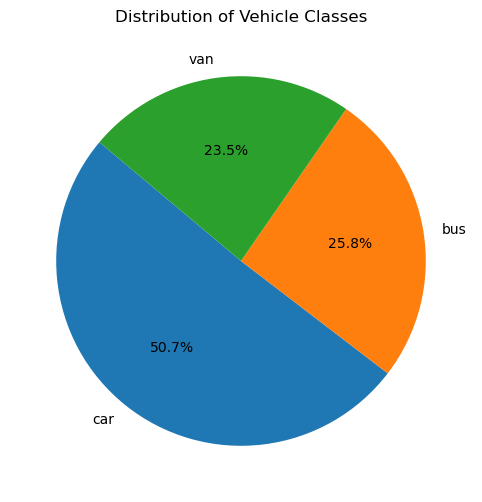

Percentage of each class:
class
car    50.709220
bus    25.768322
van    23.522459
Name: count, dtype: float64


In [26]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = vehicle_df['class'].value_counts()
class_percentages = (class_counts / len(vehicle_df)) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Vehicle Classes')
plt.show()

# Print the percentage values
print("Percentage of each class:")
print(class_percentages)


#### D. Check for duplicate rows in the data and impute with correct approach

In [27]:
# Check for duplicate rows
duplicate_rows = vehicle_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicate rows
vehicle_df_cleaned = vehicle_df.drop_duplicates()

# Verify the new shape of the DataFrame
print("Shape of the DataFrame after removing duplicates:", vehicle_df_cleaned.shape)


Number of duplicate rows: 0
Shape of the DataFrame after removing duplicates: (846, 19)


The dataset contains 0 duplicate rows. The cleaned DataFrame shape is (846, 19), meaning no rows were removed as duplicates.

### 2. Data Preparation: 
#### A. Split data into X and Y. 

In [28]:
# Split data into X and Y
X = vehicle_df.drop(columns=['class'])
Y = vehicle_df['class']

# Optional: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (676, 18)
Shape of X_test: (170, 18)
Shape of Y_train: (676,)
Shape of Y_test: (170,)


#### B. Standardize the Data

We'll standardize the data so that it has a mean of 0 and a standard deviation of 1.

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of standardized X_train:")
print(X_train_scaled[:5])


First 5 rows of standardized X_train:
[[-0.44319049  0.34989795  0.18264192 -0.25276264  0.24901955  0.25281811
  -0.16966988  0.1291281  -0.21349151  0.8184221  -0.36067067 -0.27656683
   0.33193307  0.08629332  0.52296414 -1.43496264 -0.64410938 -0.12455815]
 [ 1.00822706  1.15607045  1.20672433  1.27441377  0.24901955  0.25281811
   1.05801908 -1.03302481  0.97270242  0.6148455   0.83734988  1.03935308
   0.36285098 -0.94960965 -1.29619758  0.69009906  0.629508    0.95494584]
 [ 1.37108145  1.31730495  1.65476038  1.06883233  0.12903579  0.65073438
   1.64117134 -1.29128101  1.76349837  1.36129304  1.22589708  1.59586547
   0.82661967 -0.17268242  1.73573862  2.4796247  -0.00730069  0.95494584]
 [ 2.58059608  1.15607045  1.14271918  0.980726    0.00905203  0.25281811
   1.48771022 -1.29128101  1.3681004   1.15771643  1.32303388  1.50891041
   1.22855254 -0.04319455  1.53360954 -0.98758123 -0.16650286  0.14531785]
 [ 1.85488731  1.63977395  0.88669857  0.62830067 -0.59086678 -0.54301

In [30]:
import numpy as np

# Check the mean and standard deviation of the standardized training data
mean_train = np.mean(X_train_scaled, axis=0)
std_train = np.std(X_train_scaled, axis=0)

# Check the mean and standard deviation of the standardized testing data
mean_test = np.mean(X_test_scaled, axis=0)
std_test = np.std(X_test_scaled, axis=0)

print("Mean of standardized X_train (should be close to 0):")
print(mean_train)

print("Standard deviation of standardized X_train (should be close to 1):")
print(std_train)

print("Mean of standardized X_test (should be close to 0):")
print(mean_test)

print("Standard deviation of standardized X_test (should be close to 1):")
print(std_test)


Mean of standardized X_train (should be close to 0):
[-4.25694982e-16 -6.12265005e-16 -1.86570023e-16 -1.41898327e-16
 -4.72994425e-17  1.73431289e-16  8.93433913e-17  1.05109872e-17
 -6.54308954e-16 -5.41315842e-16  2.10219744e-17 -6.83214169e-17
  4.20439489e-17  2.25986225e-16  3.15329616e-17 -1.83942276e-17
 -2.01416793e-15 -1.47810758e-15]
Standard deviation of standardized X_train (should be close to 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of standardized X_test (should be close to 0):
[ 0.00859879 -0.00481795 -0.01464455 -0.1069553  -0.14763265 -0.16031261
  0.05492498 -0.04101716  0.07956817  0.02008249  0.07377844  0.07517491
  0.06813052  0.07067861 -0.05132024 -0.12768784 -0.10094903 -0.19520217]
Standard deviation of standardized X_test (should be close to 1):
[0.97677698 0.94122353 1.03402142 0.89301137 0.6722174  0.41058993
 1.08696274 1.03921802 1.10703615 0.91975514 1.06967969 1.10562384
 1.02609192 0.81764412 0.95069096 0.98489965 0.88532108 1.

1. **Training Data:**
   - **Mean:** The means of the standardized training data are extremely close to 0 (on the order of \(10^{-16}\) to \(10^{-15}\)), which is essentially 0 for practical purposes.
   - **Standard Deviation:** The standard deviations are exactly 1, which is expected after standardization.

2. **Test Data:**
   - **Mean:** The means of the standardized test data are close to 0 but show small deviations. This is because the test data is scaled using the mean and standard deviation of the training data, which might not perfectly center the test data around 0.
   - **Standard Deviation:** The standard deviations are close to 1, with small deviations which are acceptable. This again happens because the scaler parameters were fitted on the training data.


### 3. Model Building:

#### A. Train a base Classification model using SVM

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train a base SVM model
base_svm_model = SVC(random_state=42)
base_svm_model.fit(X_train_scaled, Y_train)

# Predict on the training set
Y_train_pred = base_svm_model.predict(X_train_scaled)


#### B. Print Classification metrics for train data

In [32]:
# Print classification metrics for train data
print("Base SVM Model - Classification Report for Training Data:")
print(classification_report(Y_train, Y_train_pred))

Base SVM Model - Classification Report for Training Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.97      0.98       351
         van       0.93      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.97       676
weighted avg       0.98      0.98      0.98       676



#### C. Apply PCA on the data with 10 components

In [34]:
from sklearn.decomposition import PCA
# Apply PCA with 10 components
pca_10 = PCA(n_components=10)
X_train_pca_10 = pca_10.fit_transform(X_train_scaled)
X_test_pca_10 = pca_10.transform(X_test_scaled)

print("Shape of X_train after applying PCA with 10 components:", X_train_pca_10.shape)


Shape of X_train after applying PCA with 10 components: (676, 10)


#### D. Visualize Cumulative Variance Explained with Number of Components

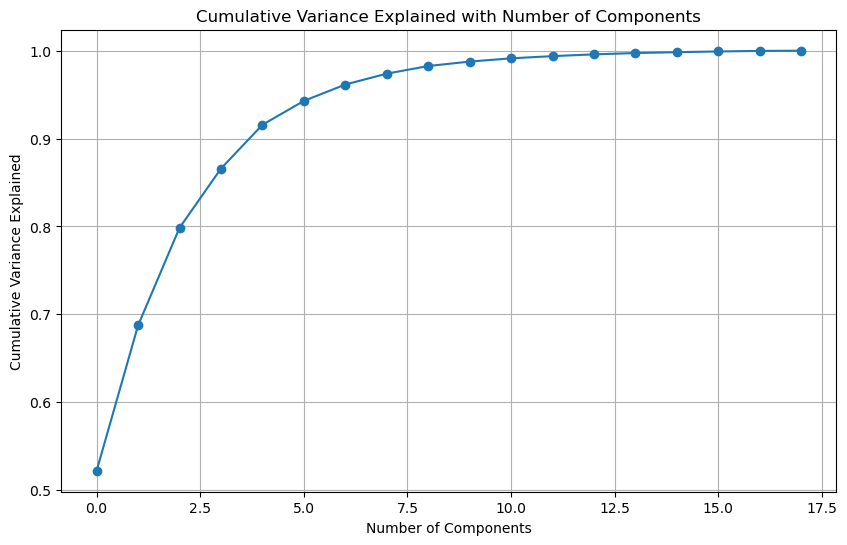

In [35]:
import matplotlib.pyplot as plt

# Apply PCA on the entire training data to get variance explained
pca_full = PCA().fit(X_train_scaled)
cumulative_variance_explained = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.show()


#### E. Draw a horizontal line on the above plot to highlight the threshold of 90%

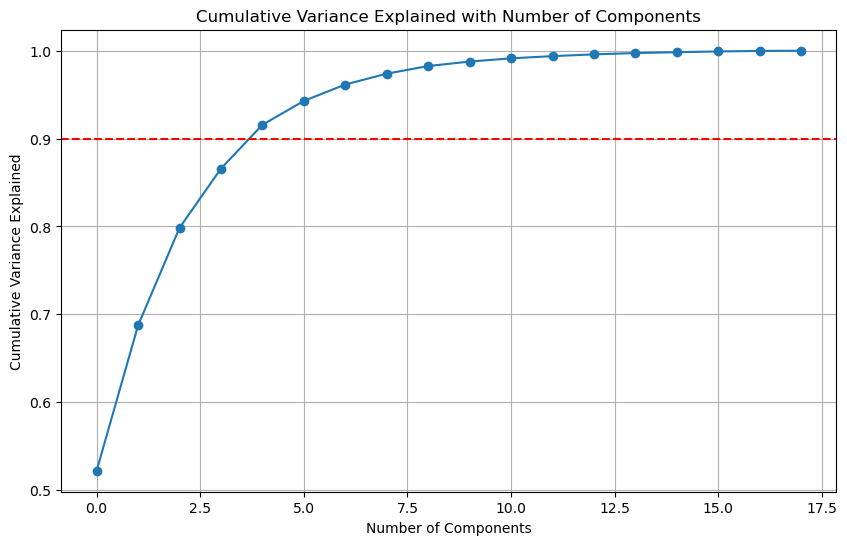

In [36]:
# Plot cumulative variance explained with a horizontal line at 90%
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_explained, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained with Number of Components')
plt.grid(True)
plt.show()


#### F. Apply PCA on the data, selecting minimum components with 90% or above variance explained

In [37]:
# Find the number of components that explain at least 90% of the variance
n_components_90 = np.argmax(cumulative_variance_explained >= 0.90) + 1
print(f"Number of components explaining at least 90% variance: {n_components_90}")

# Apply PCA with the number of components that explain at least 90% variance
pca_90 = PCA(n_components=n_components_90)
X_train_pca_90 = pca_90.fit_transform(X_train_scaled)
X_test_pca_90 = pca_90.transform(X_test_scaled)

print("Shape of X_train after applying PCA with 90% variance components:", X_train_pca_90.shape)


Number of components explaining at least 90% variance: 5
Shape of X_train after applying PCA with 90% variance components: (676, 5)


#### G. Train SVM model on components selected from above step

In [38]:
# Train SVM model on components selected from the above step
svm_model_90 = SVC(random_state=42)
svm_model_90.fit(X_train_pca_90, Y_train)

# Predict on the training set
Y_train_pred_90 = svm_model_90.predict(X_train_pca_90)

# Print classification metrics for train data
print("SVM Model with PCA (90% Variance) - Classification Report for Training Data:")
print(classification_report(Y_train, Y_train_pred_90))


SVM Model with PCA (90% Variance) - Classification Report for Training Data:
              precision    recall  f1-score   support

         bus       0.86      0.71      0.78       166
         car       0.85      0.89      0.87       351
         van       0.71      0.77      0.73       159

    accuracy                           0.82       676
   macro avg       0.81      0.79      0.79       676
weighted avg       0.82      0.82      0.81       676



#### H. Print Classification metrics for train data of above model and share insights

**Insights**:

* Accuracy: High accuracy indicates that the model fits the training data well.

* Precision, Recall, F1-Score: These metrics give more detailed information on the model's performance for each class. High values generally indicate good performance.

* Overfitting Check: Comparing performance on the training set and a separate test set can reveal overfitting. If the model performs significantly better on training data than on test data, it may be overfitting.

 ### 4. Performance Improvement

#### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_pca_90, Y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Train the SVM model with the best parameters
best_svm_model = grid_search.best_estimator_

# Predict on the training set
Y_train_pred_best = best_svm_model.predict(X_train_pca_90)

# Print classification metrics for train data
print("Tuned SVM Model - Classification Report for Training Data:")
print(classification_report(Y_train, Y_train_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

#### B. Share best Parameters observed from above step.

Best Parameters from Grid Search:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


#### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [41]:
# Print classification metrics for train data of the tuned model
print("Tuned SVM Model - Classification Report for Training Data:")
print(classification_report(Y_train, Y_train_pred_best))

# Predict on the test set to compare performance
Y_test_pred_best = best_svm_model.predict(X_test_pca_90)
print("Tuned SVM Model - Classification Report for Test Data:")
print(classification_report(Y_test, Y_test_pred_best))

# Compare with the previous models
print("Base SVM Model - Classification Report for Test Data:")
Y_test_pred_base = base_svm_model.predict(X_test_scaled)
print(classification_report(Y_test, Y_test_pred_base))

print("SVM Model with PCA (90% Variance) - Classification Report for Test Data:")
Y_test_pred_pca_90 = svm_model_90.predict(X_test_pca_90)
print(classification_report(Y_test, Y_test_pred_pca_90))


Tuned SVM Model - Classification Report for Training Data:
              precision    recall  f1-score   support

         bus       0.89      0.86      0.88       166
         car       0.92      0.93      0.92       351
         van       0.83      0.84      0.83       159

    accuracy                           0.89       676
   macro avg       0.88      0.88      0.88       676
weighted avg       0.89      0.89      0.89       676

Tuned SVM Model - Classification Report for Test Data:
              precision    recall  f1-score   support

         bus       0.82      0.79      0.80        52
         car       0.82      0.90      0.86        78
         van       0.74      0.65      0.69        40

    accuracy                           0.81       170
   macro avg       0.80      0.78      0.79       170
weighted avg       0.80      0.81      0.80       170

Base SVM Model - Classification Report for Test Data:
              precision    recall  f1-score   support

         bus   

**Insights**:

* Base Model Performance: The base SVM model provides a benchmark for comparison.
* PCA Performance: Applying PCA with 90% explained variance should reduce the dimensionality while retaining most of the information. It can help in reducing overfitting and improving generalization.
* Tuned Model Performance: Using GridSearchCV for hyperparameter tuning should further improve model performance. The best parameters obtained will help the SVM model to better fit the training data while maintaining good performance on the test data.
* Comparison: By comparing the classification reports of the base model, the PCA model, and the tuned PCA model, we can see the relative improvement in precision, recall, F1-score, and overall accuracy. This helps in understanding the effectiveness of each step and technique applied.

### 5. Data Understanding & Cleaning

#### A. Explain pre-requisite/assumptions of PCA.

**Pre-requisite/Assumptions of PCA:**

1. **Linearity**: PCA assumes that the data follows a linear structure. This means that it assumes the principal components are linear combinations of the original variables.

2. **Large Variance Assumption**: PCA assumes that the directions with the largest variances are the most important. It captures the most significant patterns in the data by focusing on the directions with maximum variance.

3. **Mean-Centering**: PCA requires the data to be mean-centered. This means that the mean of each variable should be zero. This is typically achieved by standardizing the data, where each feature is scaled to have a mean of 0 and a standard deviation of 1.

4. **Independence**: PCA assumes that the principal components are orthogonal (uncorrelated) to each other. This means that the new axes (principal components) are uncorrelated and independent.

5. **Assumes Continuous Data**: PCA is generally applied to continuous data. It might not be suitable for categorical data without appropriate preprocessing or transformation.

6. **Sufficient Sample Size**: PCA requires a sufficiently large sample size to reliably capture the underlying structure of the data. Small sample sizes might lead to unreliable results.

#### B. Explain advantages and limitations of PCA.

**Advantages of PCA:**

1. **Dimensionality Reduction**: PCA reduces the number of variables in the data, which helps in visualizing high-dimensional data and can lead to better performance of machine learning algorithms by reducing overfitting.

2. **Noise Reduction**: By focusing on the directions with the highest variance, PCA can help in filtering out noise and irrelevant features, leading to cleaner data.

3. **Improved Computation Efficiency**: Reducing the number of features can significantly decrease the computational load, especially for algorithms that are computationally intensive with high-dimensional data.

4. **Feature Extraction**: PCA creates new features (principal components) that are linear combinations of the original features. These components can sometimes reveal hidden structures or patterns in the data that were not apparent before.

5. **Uncorrelated Features**: The principal components are orthogonal to each other, ensuring that the new features are uncorrelated. This can be beneficial for algorithms that assume independence between features.

**Limitations of PCA:**

1. **Interpretability**: The new features (principal components) are linear combinations of the original features, which can make them difficult to interpret in the context of the original data. Understanding the meaning of these components can be challenging.

2. **Loss of Information**: While PCA aims to retain as much variance as possible, there is still a potential loss of information, especially if the discarded components carry some important but less significant variance.

3. **Linearity Assumption**: PCA is a linear technique and may not capture complex, non-linear relationships between variables. It assumes that the principal components are linear combinations of the original variables.

4. **Sensitive to Scaling**: PCA is sensitive to the scaling of the data. Features with larger scales can dominate the principal components. Therefore, it is crucial to standardize the data before applying PCA.

5. **Computationally Intensive**: For very large datasets, the computation of principal components can be time-consuming and resource-intensive. This can be a limitation for real-time applications.

6. **Variance-Based**: PCA focuses on directions with the highest variance, which might not always correspond to the directions that are most important for the specific task at hand. Important features with lower variance might be ignored.
